<a href="https://colab.research.google.com/github/dubeyaayush07/Parkinson_Diagnosis_from_Handwritten_Dynamics/blob/master/analysing_sequence_length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import requests, zipfile, io, os, re
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')

In [ ]:
# download file from url, extract it and store it in the dest_folder
def download_and_extract(url, dest_folder):
  r = requests.get(url)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall(dest_folder)

In [ ]:
# define folders and urls
healthy_path = './healthy'
healthy_url = 'http://wwwp.fc.unesp.br/~papa/pub/datasets/Handpd/NewHealthy/Signal.zip'
parkinson_path = './parkinson'
parkinson_url = 'http://wwwp.fc.unesp.br/~papa/pub/datasets/Handpd/NewPatients/Signal.zip'

In [ ]:
download_and_extract(healthy_url, healthy_path)

In [ ]:
download_and_extract(parkinson_url, parkinson_path)

In [ ]:
# actual downloaded signals
healthy_signals = f'{healthy_path}/Signal/'
parkinson_signals = f'{parkinson_path}/Signal/'
healthy = []
parkinson = []

In [ ]:
for filename in os.listdir(healthy_signals):
  if re.search('sigSp', filename) is not None:
    df = pd.read_csv(healthy_signals + filename, sep='\s+', header=None, comment='#')
    healthy.append(df)

for filename in os.listdir(parkinson_signals):
 if re.search('sigSp', filename) is not None:
    df = pd.read_csv(parkinson_signals + filename, sep='\s+', header=None, comment='#')
    parkinson.append(df)

In [ ]:
def preprocess(X, y):
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
  X_valid = scaler.transform(X_valid.reshape(-1, X_valid.shape[-1])).reshape(X_valid.shape)
  return X_train, X_valid, y_train, y_valid

In [ ]:
def create_dataset(healthy, parkinson, seq):
  X = []
  y = []

  # healthy signals
  for df in healthy:
    count = len(df.index) // seq
    for i in range(count):
      X.append((df.iloc[i * seq : (i + 1) * seq]).to_numpy(copy=True))
      y.append(0)

  # parkinson signals
  for df in parkinson:
    count = len(df.index) // seq
    for i in range(count):
      X.append((df.iloc[i * seq : (i + 1) * seq]).to_numpy(copy=True))
      y.append(1)

  return np.array(X), np.array(y)


In [ ]:
def train_model(X_train, X_valid, y_train, y_valid):
  model = keras.models.Sequential([
  keras.layers.GRU(128, return_sequences=True, input_shape=(X_train.shape[1], 6)),
  keras.layers.GRU(128),
  keras.layers.Dense(1, activation="sigmoid")
  ])

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, epochs = 50, batch_size = 64, validation_data=(X_valid, y_valid))
  return history



In [ ]:
sequence_list = [100, 300, 1000, 3000]
stats = []


for sequence in sequence_list:
  X, y = create_dataset(healthy, parkinson, sequence)
  X_train, X_valid, y_train, y_valid = preprocess(X, y)
  history = train_model(X_train, X_valid, y_train, y_valid)
  stats.append(history)
  print(sequence)



Epoch 1/50
587/587 [==============================] - 30s 51ms/step - loss: 0.4779 - accuracy: 0.7801 - val_loss: 0.4138 - val_accuracy: 0.8068
Epoch 2/50
587/587 [==============================] - 27s 47ms/step - loss: 0.3762 - accuracy: 0.8282 - val_loss: 0.3489 - val_accuracy: 0.8438
Epoch 3/50
587/587 [==============================] - 27s 46ms/step - loss: 0.3227 - accuracy: 0.8569 - val_loss: 0.3010 - val_accuracy: 0.8710
Epoch 4/50
587/587 [==============================] - 27s 45ms/step - loss: 0.2872 - accuracy: 0.8760 - val_loss: 0.2831 - val_accuracy: 0.8800
Epoch 5/50
587/587 [==============================] - 26s 45ms/step - loss: 0.2558 - accuracy: 0.8931 - val_loss: 0.2432 - val_accuracy: 0.8996
Epoch 6/50
587/587 [==============================] - 26s 44ms/step - loss: 0.2281 - accuracy: 0.9053 - val_loss: 0.2356 - val_accuracy: 0.9024
Epoch 7/50
587/587 [==============================] - 26s 44ms/step - loss: 0.2016 - accuracy: 0.9182 - val_loss: 0.1979 - val_accuracy:

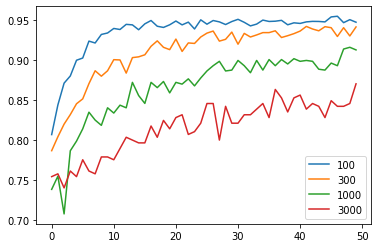

In [ ]:
# val accuracy
for i, sequence in enumerate(sequence_list):
  plt.plot(stats[i].history['val_accuracy'], label=f'{sequence}')

plt.legend()
plt.show()

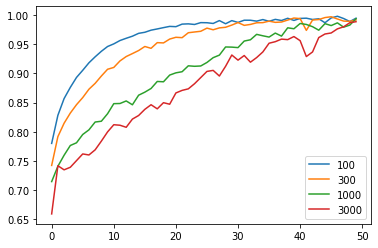

In [ ]:
# train accuracy
for i, sequence in enumerate(sequence_list):
  plt.plot(stats[i].history['accuracy'], label=f'{sequence}')

plt.legend()
plt.show()

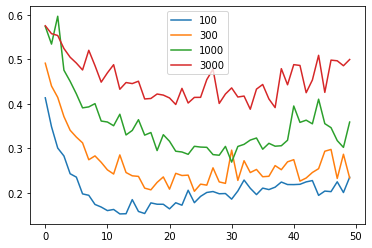

In [ ]:
# val loss
for i, sequence in enumerate(sequence_list):
  plt.plot(stats[i].history['val_loss'], label=f'{sequence}')

plt.legend()
plt.show()

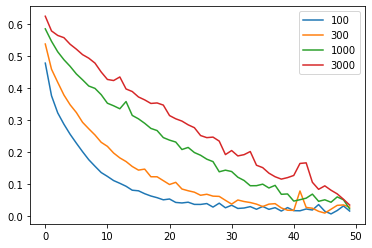

In [ ]:
# loss
for i, sequence in enumerate(sequence_list):
  plt.plot(stats[i].history['loss'], label=f'{sequence}')

plt.legend()
plt.show()

In [ ]:
sequence_list = [20, 40, 80, 100]
stats = []


for sequence in sequence_list:
  X, y = create_dataset(healthy, parkinson, sequence)
  X_train, X_valid, y_train, y_valid = preprocess(X, y)
  history = train_model(X_train, X_valid, y_train, y_valid)
  stats.append(history)
  print(sequence)

Epoch 1/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.3963 - accuracy: 0.8196 - val_loss: 0.3351 - val_accuracy: 0.8483
Epoch 2/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.3129 - accuracy: 0.8619 - val_loss: 0.3006 - val_accuracy: 0.8692
Epoch 3/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.2778 - accuracy: 0.8809 - val_loss: 0.2718 - val_accuracy: 0.8844
Epoch 4/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.2477 - accuracy: 0.8958 - val_loss: 0.2426 - val_accuracy: 0.8979
Epoch 5/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.2256 - accuracy: 0.9068 - val_loss: 0.2317 - val_accuracy: 0.9028
Epoch 6/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.2090 - accuracy: 0.9135 - val_loss: 0.2186 - val_accuracy: 0.9089
Epoch 7/50
2932/2932 [==============================] - 17s 6ms/step - loss: 0.1945 - accuracy: 0.9199 - val_loss: 0.2136 - val_ac

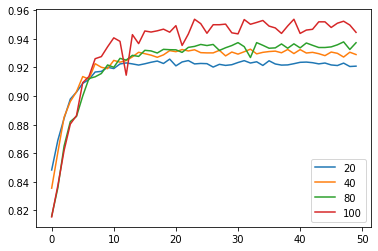

In [ ]:
# val accuracy
for i, sequence in enumerate(sequence_list):
  plt.plot(stats[i].history['val_accuracy'], label=f'{sequence}')

plt.legend()
plt.show()